In [ ]:
pip install shap

In [ ]:
pip install shap scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import shap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import lightgbm as lgb

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report)

In [ ]:
df = pd.read_csv('/content/ObesityDataSet.csv',index_col = 0)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Index,,,,,,,,,,,,,,,,,
1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Renaming of columns
df.rename(columns={'NObeyesdad': 'Obesity', 'MTRANS': 'Transportation', 'CALC': 'Alcohol', 'TUE' : 'Screentime', 'SCC': 'Calories monitoring', 'CAEC': 'Food consumption b/w meals', 'CH2O': 'Water consumption', 'FAF': 'Physical activity', 'NCP': 'Main meals', 'FCVC': 'Veg consumption', 'FAVC': 'High calorie food', 'family_history_with_overweight': 'Family history', 'SMOKE': 'Smoke'}, inplace=True)
df.head()

,Gender,Age,Height,Weight,Family history,High calorie food,Veg consumption,Main meals,Food consumption b/w meals,Smoke,Water consumption,Calories monitoring,Physical activity,Screentime,Alcohol,Transportation,Obesity
Index,,,,,,,,,,,,,,,,,
1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 1 to 2111
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      2111 non-null   object 
 1   Age                         2111 non-null   float64
 2   Height                      2111 non-null   float64
 3   Weight                      2111 non-null   float64
 4   Family history              2111 non-null   object 
 5   High calorie food           2111 non-null   object 
 6   Veg consumption             2111 non-null   float64
 7   Main meals                  2111 non-null   float64
 8   Food consumption b/w meals  2111 non-null   object 
 9   Smoke                       2111 non-null   object 
 10  Water consumption           2111 non-null   float64
 11  Calories monitoring         2111 non-null   object 
 12  Physical activity           2111 non-null   float64
 13  Screentime                  2111 

In [ ]:
#Check for any null values
df.isnull().sum()

Gender                        0
Age                           0
Height                        0
Weight                        0
Family history                0
High calorie food             0
Veg consumption               0
Main meals                    0
Food consumption b/w meals    0
Smoke                         0
Water consumption             0
Calories monitoring           0
Physical activity             0
Screentime                    0
Alcohol                       0
Transportation                0
Obesity                       0
dtype: int64

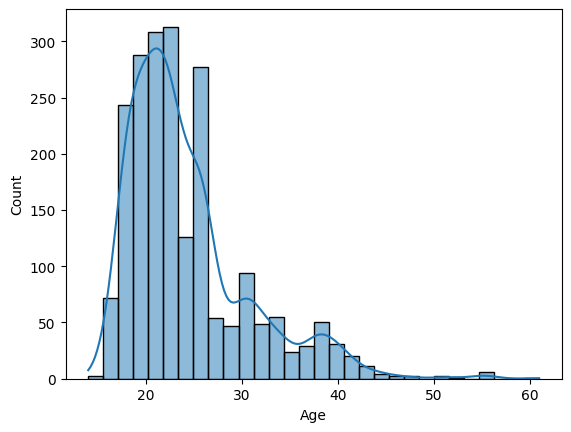

In [ ]:
#Countplot og age feature
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

<Axes: xlabel='Physical activity', ylabel='Count'>

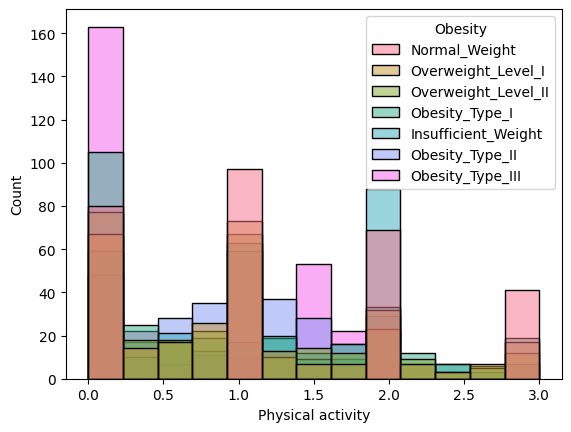

In [ ]:
#Histogram of physical activity classified on basis of obesity level
sns.histplot(df, x="Physical activity", hue="Obesity", palette="husl")

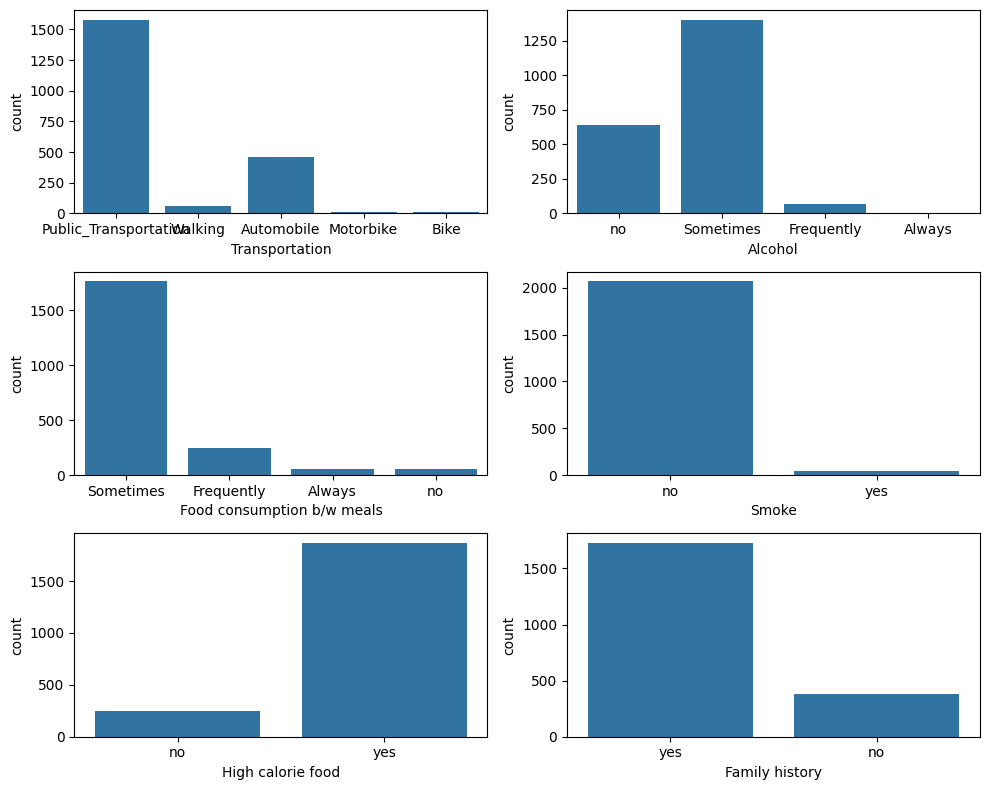

In [ ]:
#Countplots of 6 categorical features
plt.subplots(3, 2, figsize=(10, 8))
plt.subplot(3, 2, 1)
sns.countplot(x='Transportation', data=df)
plt.subplot(3, 2, 2)
sns.countplot(x='Alcohol', data=df)
plt.subplot(3, 2, 3)
sns.countplot(x='Food consumption b/w meals', data=df)
plt.subplot(3, 2, 4)
sns.countplot(x='Smoke', data=df)
plt.subplot(3, 2, 5)
sns.countplot(x='High calorie food', data=df)
plt.subplot(3, 2, 6)
sns.countplot(x='Family history', data=df)
plt.tight_layout()
plt.show()

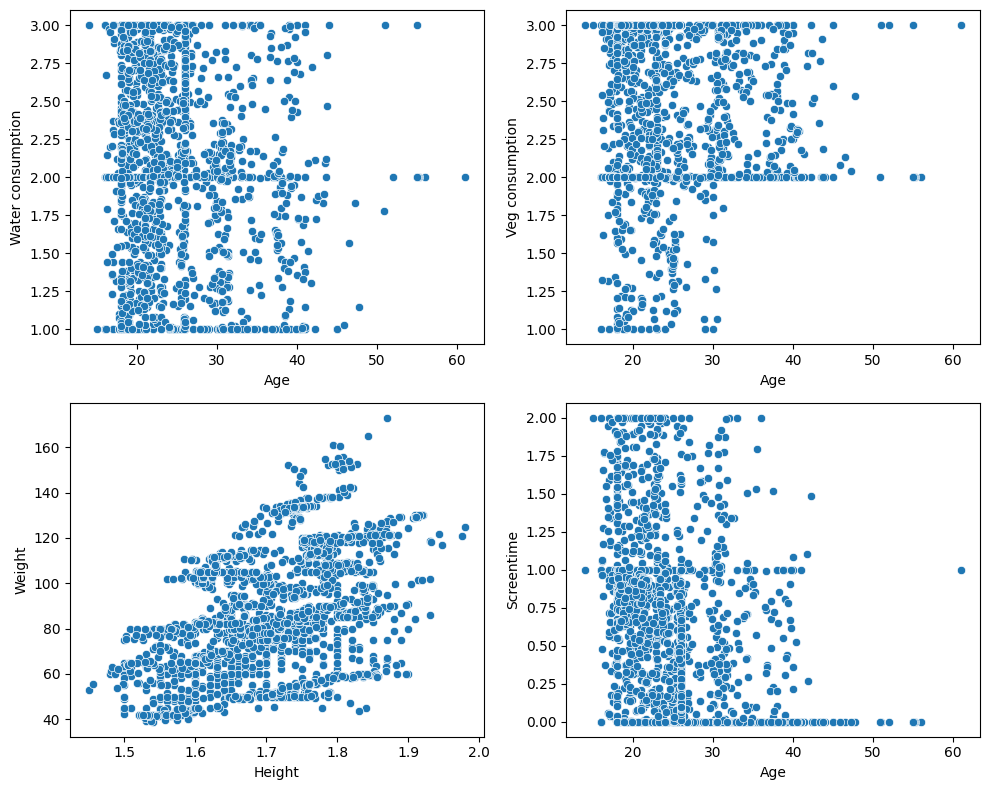

In [ ]:
#Scatterplots to show relation between pairs of features
plt.subplots(2, 2, figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Water consumption', data=df)
plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='Veg consumption', data=df)
plt.subplot(2, 2, 3)
sns.scatterplot(x='Height', y='Weight', data=df)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='Screentime', data=df)
plt.tight_layout()
plt.show()

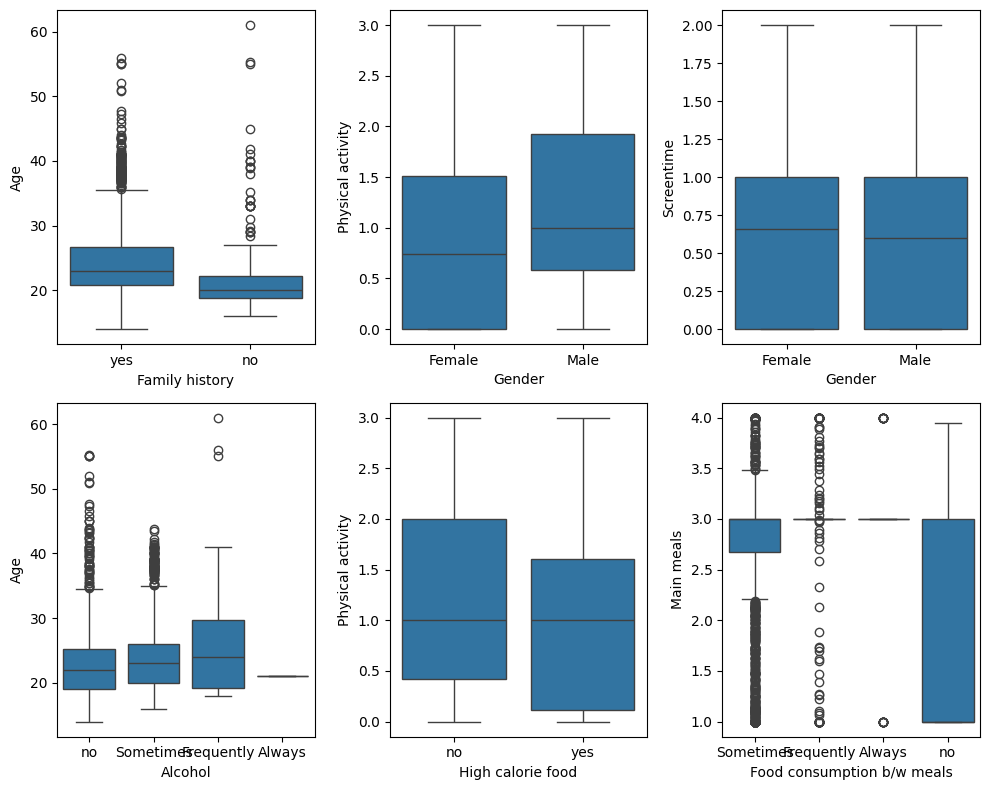

In [ ]:
#Boxplots showing
plt.subplots(2, 3, figsize=(10, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x='Family history', y='Age', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='Gender', y='Physical activity', data=df)
plt.subplot(2, 3, 3)
sns.boxplot(x='Gender', y='Screentime', data=df)
plt.subplot(2, 3, 4)
sns.boxplot(x='Alcohol', y='Age', data=df)
plt.subplot(2, 3, 5)
sns.boxplot(x='High calorie food', y='Physical activity', data=df)
plt.subplot(2, 3, 6)
sns.boxplot(x='Food consumption b/w meals', y='Main meals', data=df)
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



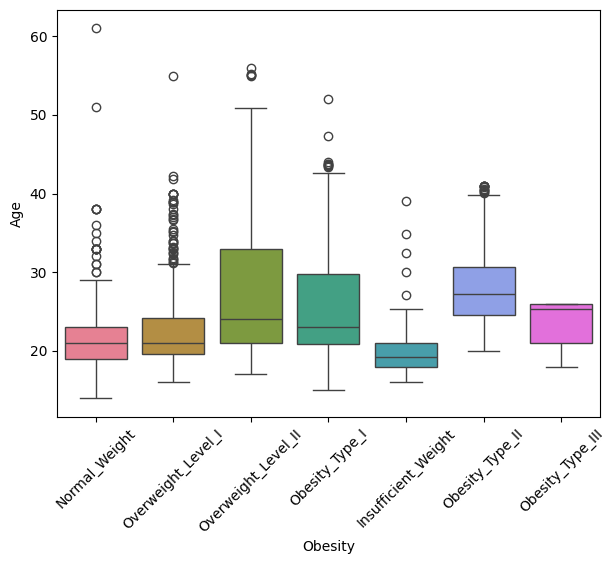

In [ ]:
#Boxplot showing relation between Obesity level and age of person
sns.boxplot(x='Obesity', y='Age', data=df, palette="husl")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

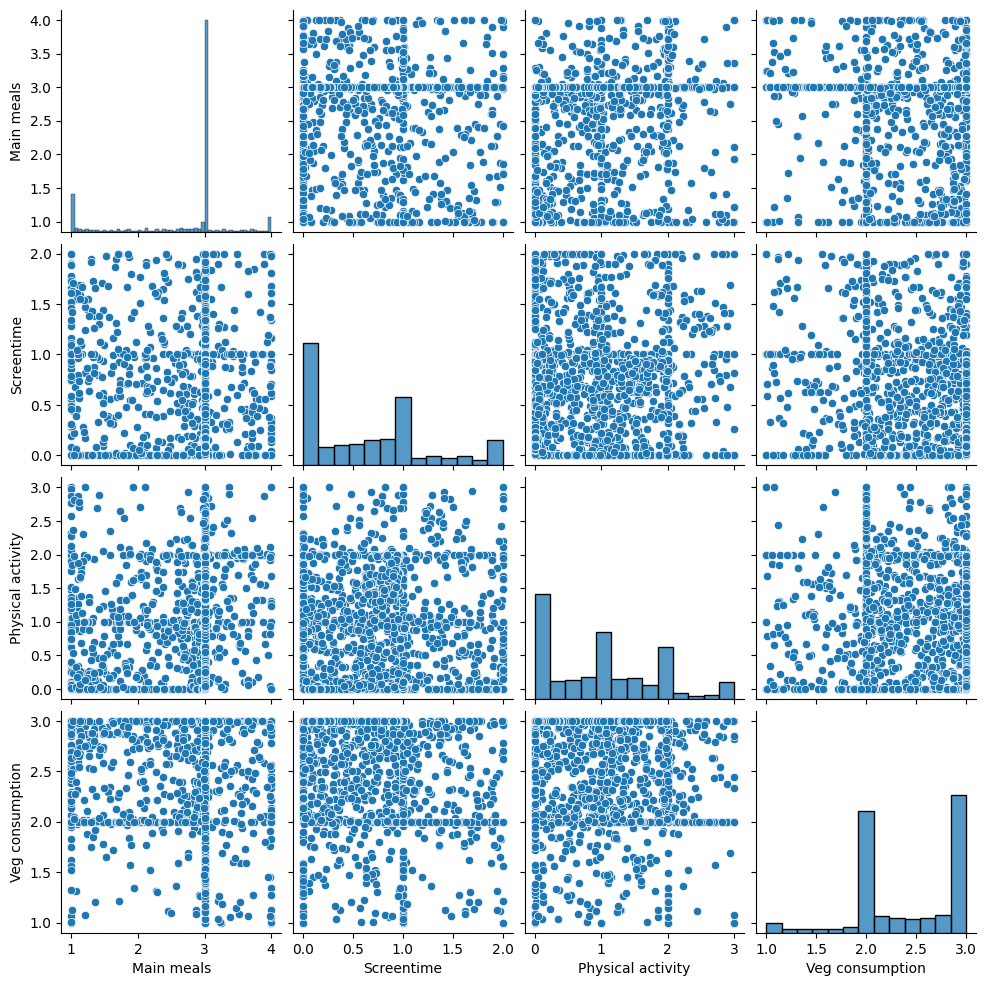

In [ ]:
#Pairplots to show relation among 4 features
sns.pairplot(df[['Main meals', 'Screentime', 'Physical activity', 'Veg consumption']])
plt.show()

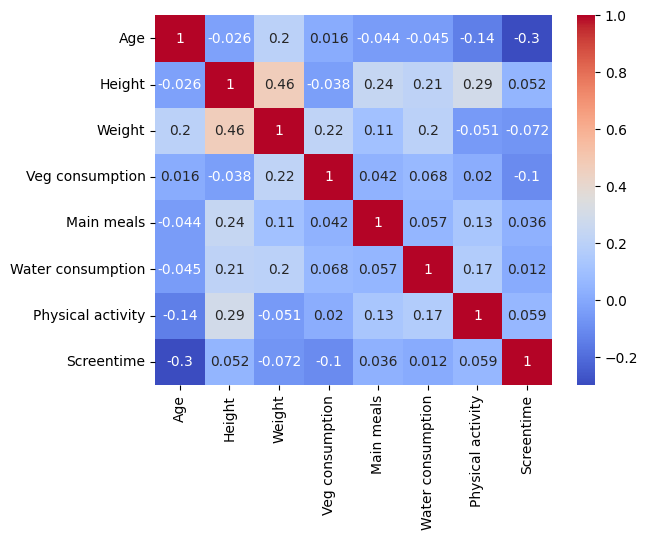

In [ ]:
#Correlation map
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Changing categorical variables to numerical variables using lambda function
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
df.head()

,Gender,Age,Height,Weight,Family history,High calorie food,Veg consumption,Main meals,Food consumption b/w meals,Smoke,Water consumption,Calories monitoring,Physical activity,Screentime,Alcohol,Transportation,Obesity
Index,,,,,,,,,,,,,,,,,
1,0,21.0,1.62,64.0,0,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0
2,0,21.0,1.52,56.0,0,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0
3,1,23.0,1.80,77.0,0,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0
4,1,27.0,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,1
5,1,22.0,1.78,89.8,1,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,2


In [ ]:
columns_with_decimal = ['Height', 'Weight']
columns_without_decimal = ['Age', 'Water consumption', 'Physical activity', 'Screentime']

df[columns_with_decimal] = df[columns_with_decimal].round(2)
df[columns_without_decimal] = df[columns_without_decimal].round(0)

df.head()

,Gender,Age,Height,Weight,Family history,High calorie food,Veg consumption,Main meals,Food consumption b/w meals,Smoke,Water consumption,Calories monitoring,Physical activity,Screentime,Alcohol,Transportation,Obesity
Index,,,,,,,,,,,,,,,,,
1,0,21.0,1.62,64.0,0,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0
2,0,21.0,1.52,56.0,0,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0
3,1,23.0,1.80,77.0,0,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0
4,1,27.0,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,1
5,1,22.0,1.78,89.8,1,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,2


In [ ]:
X = df.drop("Obesity", axis=1)
y = df["Obesity"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

Euclidean KNN Classification

In [ ]:
#Calculating value of K where error rate is minimum
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_i))

IndexError: index 91265 is out of bounds for axis 0 with size 1688

In [ ]:
#Calculating value of K where accuracy is maximum
acc = []
from sklearn import metrics
for i in range(1,40):
  neighbor = KNeighborsClassifier(n_neighbors=i)
  neighbor.fit(X_train, y_train)
  yhat = neighbor.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
euc_knn = KNeighborsClassifier(n_neighbors=1)
euc_knn.fit(X_train, y_train)

In [ ]:
euc_knn_pred = euc_knn.predict(X_test)

euc_knn_accuracy = accuracy_score(y_test, euc_knn_pred)
euc_knn_precision = precision_score(y_test, euc_knn_pred, average="weighted")
euc_knn_f1 = f1_score(euc_knn_pred, y_test, average="weighted")

print(f"Accuracy: {euc_knn_accuracy}")
print(f"Precision: {euc_knn_precision}")
print(f"F1 score: {euc_knn_f1}")

In [ ]:
K = 40

#Creating an explainer object with summarized background data
background_summary = shap.sample(X_train, K)
explainer = shap.KernelExplainer(euc_knn.predict_proba, background_summary)

X_test_reset_index = X_test.reset_index(drop=True)

#Calculating SHAP values for a subset of the test set
shap_values = explainer.shap_values(X_test_reset_index.iloc[:100])

#Summarizing the effects of all the features
shap.summary_plot(shap_values, X_test_reset_index.iloc[:100], feature_names=X_train.columns)

In [ ]:
remove_columns= ['Weight', 'Obesity']
new_X = df.drop(columns=remove_columns)
y = df["Obesity"]

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size=0.2, random_state=125)

In [ ]:
new_euc_knn = KNeighborsClassifier(n_neighbors=1)
new_euc_knn.fit(new_X_train, y_train)
new_euc_knn_pred = new_euc_knn.predict(new_X_test)

In [ ]:
K = 40

#Creating an explainer object with summarized background data
background_summary = shap.sample(new_X_train, K)
explainer = shap.KernelExplainer(new_euc_knn.predict_proba, background_summary)

X_test_reset_index = new_X_test.reset_index(drop=True)

#Calculating SHAP values for a subset of the test set
shap_values = explainer.shap_values(X_test_reset_index.iloc[:100])

#Summarizing the effects of all the features without the weight feature to visualize other features in a better way
shap.summary_plot(shap_values, X_test_reset_index.iloc[:100], feature_names=new_X_train.columns)

Manhattan KNN Classification

In [ ]:
#Calculating value of K where error rate is minimum
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i, p=1)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_i))

In [ ]:
#Calculating value of K where accuracy is maximum
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, p=1).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
man_knn = KNeighborsClassifier(n_neighbors=2, p=1)
man_knn.fit(X_train, y_train)

In [ ]:
man_knn_pred = man_knn.predict(X_test)

man_knn_accuracy = accuracy_score(y_test, man_knn_pred)
man_knn_precision = precision_score(y_test, man_knn_pred, average="weighted")
man_knn_f1 = f1_score(y_test, man_knn_pred, average="weighted")

print(f"Accuracy: {man_knn_accuracy}")
print(f"Precision: {man_knn_precision}")
print(f"F1 score: {man_knn_f1}")

In [ ]:
print(classification_report(y_test, man_knn_pred))

Naive Bayes Gaussian Classification

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:
nb_pred = model.predict(X_test)

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_precision = precision_score(y_test, nb_pred, average="weighted")
nb_f1 = f1_score(nb_pred, y_test, average="weighted")

print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("F1 Score:", nb_f1)

In [ ]:
print(classification_report(y_test, nb_pred))

In [ ]:
#Hyperparameter tuning of Naive Bayes Gaussian classifier
cv_method = KFold(n_splits=5, shuffle=True, random_state=42)
power_transformer = PowerTransformer().fit(X_train)

X_train_transformed = power_transformer.transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method, verbose=1, scoring='accuracy')
gs_NB.fit(X_train_transformed, y_train)

best_params = gs_NB.best_params_
print("Best Parameters:", best_params)

test_accuracy = gs_NB.score(X_test_transformed, y_test)
print("Test Accuracy:", test_accuracy)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 11,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

gbm = lgb.train(params, train_data, num_boost_round=100)
y_pred = gbm.predict(X_test)

lgb_accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
print("Accuracy:", lgb_accuracy)

In [ ]:
#Hyperparameter tuning of LGB classifier
lgb_clf = lgb.LGBMClassifier()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [10, 20, 30],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(lgb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

lgb_accuracy= grid_search.best_score_

print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", lgb_accuracy)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

lgb_precision = precision_score(y_test, y_pred, average='weighted')
lgb_f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", lgb_precision)
print("F1 Score: ", lgb_f1)

In [ ]:
#Table to compare accuracy, precision, and f1 score of all models
accuracy = [euc_knn_accuracy, man_knn_accuracy, nb_accuracy, lgb_accuracy ]
precision = [euc_knn_precision, man_knn_precision,nb_precision, lgb_precision]
f1 = [euc_knn_f1, man_knn_f1, nb_f1, lgb_f1]

table = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}, index=['Euc_KNN', 'Man_KNN', 'Naive Bayes', 'lgb_clf'])
print(table)


LGB model with hyperparamter tuning is the most optimal model to classify this dataset with highest accuracy of around 98%.